# Explore your predicted clusters

## Import packages and set input dir path

In [1]:
import collections
import csv
import numpy as np
import os
from IPython.core.display import display, HTML
from nltk.corpus import stopwords
import nltk

In [2]:
# Change this if necessary
input_dir_path = './'
data_dir_path = 'data/'

## Read clustering files produced by clustering.py

In [3]:
def read_clustering_files(dir_path, suffix='_clusters.csv'):
    pretrained_clustering_file_path = os.path.join(dir_path, 'pretrained' + suffix)
    custom_clustering_file_path = os.path.join(dir_path, 'custom' + suffix)
    sparse_clustering_file_path = os.path.join(dir_path, 'sparse' + suffix)
    return np.loadtxt(pretrained_clustering_file_path, delimiter=',', dtype=int), np.loadtxt(custom_clustering_file_path, delimiter=',', dtype=int), np.loadtxt(sparse_clustering_file_path, delimiter=',', dtype=int)

In [200]:
pretrained_clusters, custom_clusters, sparse_clusters = read_clustering_files(input_dir_path)
print('Review ID range:', np.min(pretrained_clusters[:, 0]), '-', np.max(pretrained_clusters[:, 0]))

Review ID range: 12500 - 24999


## Leverage useful functions for your analysis

In [217]:
def clusters_by_cid(cid, clusters):
    # returns set of review ids which were in cluster cid
    return clusters[clusters[:, 1] == cid, 0]


def clusters_by_rid(rid, clusters):
    # returns set of review ids that are in the same cluster as review rid
    cid = clusters[rid][1]
    return clusters_by_cid(cid, clusters)


def get_htm_text(rid, data_dir_path):
    # return the html text of the review
    with open(os.path.join(data_dir_path, 'train', str(rid) + '.txt'), 'r') as fp:
        return HTML(*fp.readlines())

In [40]:
def get_html_text(rid, data_dir_path):
    # return the html text of the review
    with open(os.path.join(data_dir_path, 'train', str(rid) + '.txt'), 'r') as reviewfile:
        return reviewfile.read()

### Example 1: extract review IDs whose predicted cluster IDs = 0

In [222]:
extracted_review_ids1 = clusters_by_cid(4, pretrained_clusters) #4，8
extracted_review_ids1

array([12503, 12509, 12540, 12551, 12552, 12565, 12580, 12602, 12614,
       12659, 12673, 12679, 12680, 12691, 12696, 12697, 12705, 12722,
       12734, 12738, 12740, 12742, 12746, 12770, 12784, 12824, 12826,
       12834, 12850, 12874, 12879, 12906, 12908, 12911, 12931, 12936,
       12937, 12944, 12945, 12951, 12956, 12965, 12969, 12975, 12997,
       13000, 13005, 13035, 13038, 13059, 13062, 13065, 13071, 13078,
       13081, 13084, 13095, 13115, 13124, 13127, 13129, 13144, 13157,
       13164, 13221, 13222, 13224, 13235, 13260, 13269, 13283, 13299,
       13313, 13318, 13322, 13329, 13335, 13354, 13358, 13363, 13376,
       13377, 13394, 13399, 13402, 13403, 13409, 13413, 13433, 13441,
       13444, 13445, 13451, 13473, 13527, 13535, 13546, 13547, 13571,
       13577, 13582, 13595, 13604, 13605, 13622, 13625, 13659, 13661,
       13665, 13696, 13714, 13726, 13730, 13741, 13747, 13750, 13751,
       13772, 13795, 13829, 13855, 13866, 13874, 13885, 13901, 13928,
       13940, 13943,

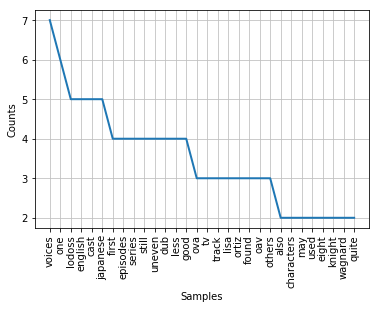

In [223]:
for i in extracted_review_ids1:
    Bose=[]
    
    html_text=get_html_text(i, data_dir_path)
    Bose.append(html_text)

stop = set(stopwords.words('english'))
new = [i for i in str(Bose).lower().split() if i not in stop and i.isalpha() ]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(30,cumulative = False)


    

In [239]:
get_htm_text(19236, data_dir_path) # 12944, 14187, 

In [240]:
get_htm_text(14187, data_dir_path)

In [247]:
extracted_review_ids1 = clusters_by_cid(3, pretrained_clusters) #4，8
extracted_review_ids1

array([12544, 12563, 12570, ..., 24996, 24998, 24999])

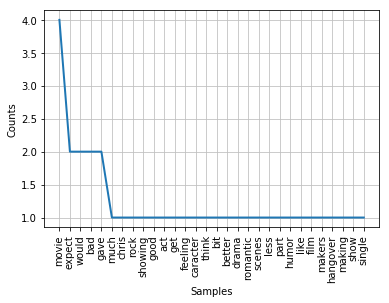

In [248]:
for i in extracted_review_ids1:
    Bose=[]
    
    html_text=get_html_text(i, data_dir_path)
    Bose.append(html_text)
stop = set(stopwords.words('english'))
new = [i for i in str(Bose).lower().split() if i not in stop and i.isalpha() ]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(30,cumulative = False)

In [251]:
get_htm_text(24999, data_dir_path)  #

In [250]:
get_htm_text(12563, data_dir_path)  #

In [252]:
get_htm_text(24998, data_dir_path) 

In [253]:
extracted_review_ids2 = clusters_by_cid(11, custom_clusters) #8,11
extracted_review_ids2

array([12507, 12517, 12523, 12533, 12583, 12596, 12609, 12612, 12622,
       12640, 12660, 12663, 12673, 12674, 12683, 12717, 12732, 12742,
       12785, 12819, 12885, 12909, 12913, 12915, 12924, 12935, 12950,
       12994, 13006, 13013, 13014, 13053, 13058, 13061, 13154, 13159,
       13207, 13208, 13231, 13242, 13274, 13289, 13290, 13295, 13319,
       13338, 13346, 13369, 13379, 13400, 13420, 13457, 13458, 13468,
       13480, 13494, 13504, 13510, 13538, 13548, 13559, 13568, 13572,
       13588, 13590, 13627, 13628, 13632, 13650, 13661, 13693, 13758,
       13801, 13803, 13818, 13820, 13856, 13862, 13866, 13873, 13891,
       13929, 13941, 13952, 13997, 14015, 14016, 14023, 14029, 14031,
       14041, 14082, 14121, 14130, 14136, 14146, 14148, 14157, 14165,
       14172, 14181, 14203, 14234, 14249, 14251, 14253, 14289, 14383,
       14423, 14432, 14446, 14447, 14458, 14476, 14485, 14501, 14527,
       14531, 14584, 14599, 14610, 14662, 14681, 14705, 14724, 14758,
       14762, 14771,

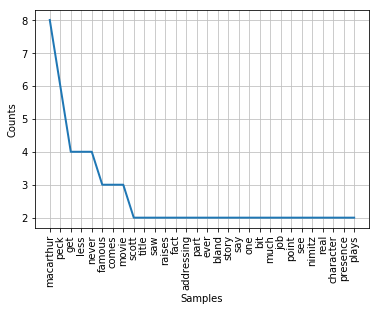

In [254]:
for i in extracted_review_ids2:
    ids2=[]
    
    html_text=get_html_text(i, data_dir_path)
    ids2.append(html_text)

stop = set(stopwords.words('english'))
new = [i for i in str(ids2).lower().split() if i not in stop and i.isalpha() ]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(30,cumulative = False)

In [271]:
get_htm_text(14121, data_dir_path) 

In [266]:
get_htm_text(22652, data_dir_path) 

In [284]:
get_htm_text(21263, data_dir_path) 

In [307]:
extracted_review_ids2 = clusters_by_cid(9, custom_clusters) #8,11,6
extracted_review_ids2

array([12510, 12530, 12543, ..., 24950, 24980, 24998])

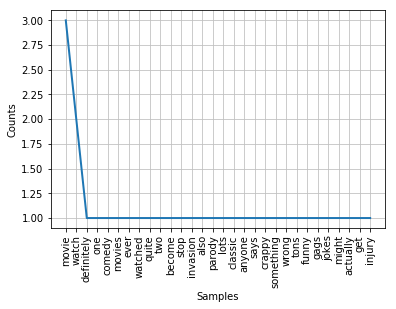

In [308]:
for i in extracted_review_ids2:
    ids2=[]
    
    html_text=get_html_text(i, data_dir_path)
    ids2.append(html_text)

stop = set(stopwords.words('english'))
new = [i for i in str(ids2).lower().split() if i not in stop and i.isalpha() ]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(30,cumulative = False)

In [315]:
get_htm_text(12510, data_dir_path) 

In [297]:
get_htm_text(12503, data_dir_path) 

In [302]:
get_htm_text(24989, data_dir_path) 

In [342]:
extracted_review_ids3 = clusters_by_cid(3, sparse_clusters) #3,1
extracted_review_ids3

array([12590, 14055, 14056, 15009, 15082, 15394, 15528, 15739, 16637,
       17058, 17270, 17877, 17946, 18110, 18481, 18609, 18662, 19843,
       19887, 20554, 21435, 21760, 21779, 23033, 23063, 24318])

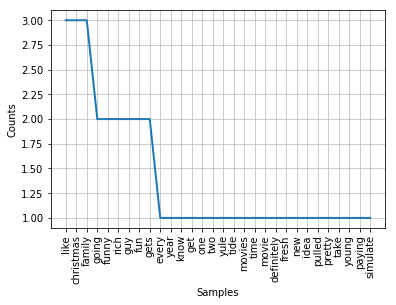

In [343]:
for i in extracted_review_ids3:
    ids3=[]
    
    html_text=get_html_text(i, data_dir_path)
    ids3.append(html_text)

stop = set(stopwords.words('english'))
new = [i for i in str(ids3).lower().split() if i not in stop and i.isalpha() ]
Freq_dist_nltk=nltk.FreqDist(new)
Freq_dist_nltk.plot(30,cumulative = False)

In [344]:
get_htm_text(12590, data_dir_path) 

In [345]:
get_htm_text(14055, data_dir_path) 

In [347]:
get_htm_text(24318, data_dir_path) 

### Example 2: extract review IDs whose predicted cluster IDs are equal to that of review ID = 8

In [14]:
extracted_review_ids2 = clusters_by_rid(2, pretrained_clusters)
print (extracted_review_ids2)

[12502 12506 12509 ... 24981 24983 24989]


### Example 3: get and show HTML text object of review ID = 8

In [15]:
html_text = get_html_text(8, data_dir_path)
display(html_text)

## Examples of useful set of operations when reading in multiple files

In [130]:
def check_if_pair_in_same_clusters(rid1, rid2, clusters1, clusters2):
    # returns true if reviews rid1 and rid2 are clustered together in clusters1 and clustered together in clusters2
    idx1 = rid1 - len(clusters1)
    idx2 = rid2 - len(clusters2)
    return clusters1[idx1][1] == clusters1[idx2][1] and clusters2[idx1][1] == clusters2[idx2][1]


def extract_overlapped_review_ids(cid1, cid2, clusters1, clusters2):
    # returns reviews that are common to cluster cid1 in clusters1 and cluster cid2 in clusters2
    cid1_review_ids = clusters_by_cid(cid1, clusters1)
    cid2_review_ids = clusters_by_cid(cid2, clusters2)
    cid1_review_id_set = set(cid1_review_ids)
    cid2_review_id_set = set(cid2_review_ids)
    overlapped_set = set.intersection(cid1_review_id_set, cid2_review_id_set)
    overlapped_rate = len(overlapped_set) / len(cid1_review_id_set)
    return list(overlapped_set), overlapped_rate

In [41]:
check_if_pair_in_same_clusters(2000, 1000, pretrained_clusters, custom_clusters)

False

In [ ]:
#7,0(41) ,  8,6(58),  5,7(38),  1,8(45),  pretrained, custom

In [ ]:
#9,0(77), 3,1(80), 2,3(60), pretrained, sparse

In [ ]:
# 9,2(83), 8，4(53) custom, sparse

In [212]:
Daniel=[0,1,2,3,4,5,6,7,8,9,10,11]
for i in Daniel:
    overlapped_ids, overlapped_rate = extract_overlapped_review_ids(i, 4, custom_clusters, sparse_clusters)
    print(str(overlapped_rate * 100) + '% of review IDs are overlapped')

20.11935208866155% of review IDs are overlapped
52.94117647058824% of review IDs are overlapped
44.4353518821604% of review IDs are overlapped
22.73449920508744% of review IDs are overlapped
18.475073313782993% of review IDs are overlapped
20.553691275167786% of review IDs are overlapped
20.332541567695962% of review IDs are overlapped
21.508034610630407% of review IDs are overlapped
53.4466477809254% of review IDs are overlapped
16.11635220125786% of review IDs are overlapped
27.176781002638524% of review IDs are overlapped
44.76067270375162% of review IDs are overlapped


## Don't be satisfied with our defined functions
Make your own functions and/or combine our defined functions for comparing clusters